In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import cm

## 데이터 가공

In [16]:
# 데이터 불러오기
df = pd.read_csv('D:/Project/data/cluster_data.csv',encoding='cp949')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,품종,당도,산도,바디,타닌
0,멘시아 (Mencia),1,0,4,0
1,템프라니요 (Tempranillo),1,0,4,0
2,카베르네 소비뇽 (Cabernet Sauvignon),1,3,5,5
3,모스카토 (Moscato ),4,2,2,1
4,진판델 (Zinfandel),3,2,3,1
...,...,...,...,...,...
11643,네비올로 (Nebbiolo),1,3,3,3
11644,템프라니요 (Tempranillo),1,3,3,3
11645,베르데호 (Verdejo),1,3,1,1
11646,모나스트렐 (Monastrell),1,3,3,3


In [17]:
## 원핫인코딩
df=pd.get_dummies(data = df, columns = ['품종'], prefix = '품종')
df=pd.get_dummies(data = df, columns = ['당도'], prefix = '당도')
df=pd.get_dummies(data = df, columns = ['산도'], prefix = '산도')
df=pd.get_dummies(data = df, columns = ['바디'], prefix = '바디')
df=pd.get_dummies(data = df, columns = ['타닌'], prefix = '타닌')
df

,품종_가르가네가 (Garganega),품종_가르나차 (Garnacha),품종_가르나차 (Garnatxa),품종_가르나차 틴토레라 (Garnacha Tintorera),품종_가메이 (Gamay),품종_게뷔르츠트라미너 (Gewurztraminer),품종_고데요 (Godello),품종_그레케토 비앙코 (Grechetto Bianco),품종_그레코 비앙코 (Greco Bianco),품종_그로 만생 (Gros Manseng),...,바디_2,바디_3,바디_4,바디_5,타닌_0,타닌_1,타닌_2,타닌_3,타닌_4,타닌_5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11644,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11646,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Clustering

In [18]:
## 최적 클러스터 갯수 정하기
def elbow(X):
    see = []
    for i in range(1,20):
        km = cluster.KMeans(n_clusters=i,random_state=0)
        km.fit(X)
        see.append(km.inertia_)
    plt.figure(figsize=(10,10))
    plt.plot(range(1,20), see, marker='o')
    plt.show()

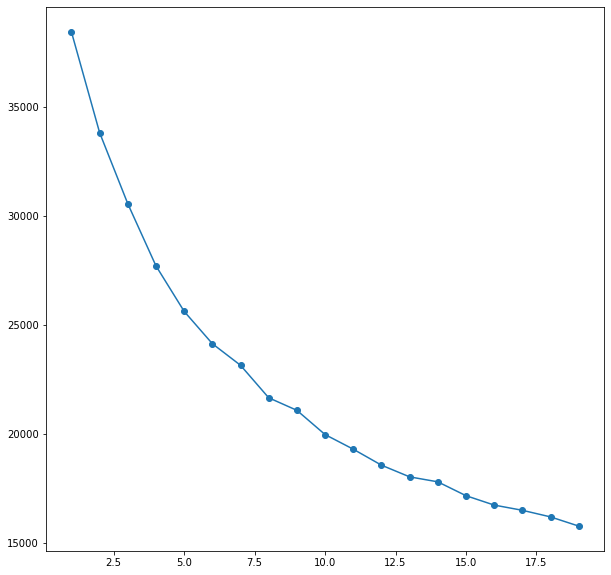

In [19]:
## 클러스터 갯수 = 8
elbow(df)

In [20]:
# 군집화(K-Means)
model=cluster.KMeans(n_clusters=8)
model.fit(df)
predict = model.labels_

In [21]:
for i in range(8):
    idx = np.where(predict==i)
    print(len(idx[0]))

1337
1718
1253
2335
1234
1223
1140
1408


In [22]:
## 검증
a=[8484,
8491,
8509,
8896,
8897,
9115,
9494
]
lists=[]
for i in a:
    lists.append(predict[i])
count={}
for i in lists:
    try: count[i] += 1
    except: count[i]=1
print(count)
print(len(a))

{1: 3, 6: 4}
7


In [23]:
df_test.to_csv('D:/Project/data/cluster_final.csv',encoding='cp949')